## Analysis for paper writing
Author: Sahar H. El Abbadi
Date: 2023-04-12


## Summarize distribution of overpasses

Total number of overpasses, missing data, max and min given to each team, number that passed Stanford QC

Missing overpasses: documented as an overpass by Stanford, but not included in Operator Report file

#### Carbon Mapper overpass summary for results

In [8]:
from writing_analysis import operator_releases_summary_stats
# Carbon Mapper
operator = 'Carbon Mapper'
operator_releases_summary_stats(operator)

Carbon Mapper: 121 flightlines reported to SU
8 overpasses that fail SU QC
113 overpasses that pass SU QC
82 overpasses quantified by Carbon Mapper
31 overpasses removed by Carbon Mapper

3 overpasses documented by Stanford but not reported by Carbon Mapper

Total releases conducted by Stanford (including missing overpasses not reported by Carbon Mapper: 124

Largest volume overpass for Carbon Mapper that passes SU qc:
Release Rate: 1443.09917328525 kg CH4 / hr
[1366.7685660986533, 1519.4297804718465, 95% CI]
(sigma from gas flow: 40.877526)
(sigma from meter: 1.936967)
(sigma from gas composition: 0.001362)
(combined total sigma: 38.944187)

Largest volume overpass for Carbon Mapper that passes operator & SU qc:
Release Rate: 855.7130366849999 kg CH4 / hr
[844.1545076813927, 867.2715656886071, 95% CI]
(sigma from gas flow: 5.014883)
(sigma from meter: 1.143755)
(sigma from gas composition: 0.003645)
(combined total sigma: 5.897209)

Smallest non-zero volume overpass for Carbon Mapper 

### GHGSat summary for results

In [10]:
from writing_analysis import operator_releases_summary_stats
# GHGSat
operator = 'GHGSat'
operator_releases_summary_stats(operator)

GHGSat: 192 flightlines reported to SU
57 overpasses that fail SU QC
135 overpasses that pass SU QC
134 overpasses quantified by GHGSat
1 overpasses removed by GHGSat

2 overpasses documented by Stanford but not reported by GHGSat

Total releases conducted by Stanford (including missing overpasses not reported by GHGSat: 194

Largest volume overpass for GHGSat that passes SU qc:
Release Rate: 1144.809472515 kg CH4 / hr
[1112.419998540914, 1177.1989464890858, 95% CI]
(sigma from gas flow: 16.629319)
(sigma from meter: 1.530164)
(sigma from gas composition: 0.003645)
(combined total sigma: 16.525242)

Largest volume overpass for GHGSat that passes operator & SU qc:
Release Rate: 1144.809472515 kg CH4 / hr
[1112.419998540914, 1177.1989464890858, 95% CI]
(sigma from gas flow: 16.629319)
(sigma from meter: 1.530164)
(sigma from gas composition: 0.003645)
(combined total sigma: 16.525242)

Smallest non-zero volume overpass for GHGSat that passes operator and SU qc:
Release Rate: 1.0496078147

In [5]:
# Check GHGSat's internal QC for points they quantified but flagged as sub-optimal

from methods_source import load_operator_report_dictionary, load_overpass_summary
operator = 'GHGSat'
ghg_report = load_operator_report_dictionary()['ghg_1']

# QC flag of GH-2 means that emissions were quantified despite sub-optimal conditions.
# QC flag of GH-4 means diffuse emissions visible over site

ghg_report_quantified = ghg_report.loc[ghg_report.QuantifiedPlume == True]
qc_mask = (ghg_report_quantified['QCFlag'] == 'GH-2') | (ghg_report_quantified['QCFlag'] == 'GH-4')
ghg_report_poor_conditions = ghg_report_quantified.loc[qc_mask]
# list of overpass ID's with poor conditions but quantified
poor_condition_overpasses = ghg_report_poor_conditions['overpass_id']
overpasses = load_overpass_summary(operator, stage=1)

# Find the overpasses in the overpass summary, to see which ones of them pass Stanford QC
poor_condition_overpass_summary = overpasses[overpasses['overpass_id'].isin(poor_condition_overpasses)]

# Select overpasses that pass Stanford QC
poor_condition_overpasses_pass_SU = poor_condition_overpass_summary.loc[poor_condition_overpass_summary.stanford_kept == True]

print(f'Number of overpasses that pass SU quality control but are flagged by GHGSat as sub-optimal conditions for quantification: {len(poor_condition_overpasses_pass_SU)}')

Number of overpasses that pass SU quality control but are flagged by GHGSat as sub-optimal conditions for quantification: 9


In [6]:
# Further investigate GHGSat false negatives, as they detect small releases but also had some higher false negatives
from methods_source import load_overpass_summary, classify_confusion_categories

from writing_analysis import print_overpass_info

operator = 'GHGSat'
overpasses = load_overpass_summary(operator, stage=1)
pass_su_qc = overpasses.loc[overpasses.qc_summary == 'pass_all']
true_positives, false_positives, true_negatives, false_negatives = classify_confusion_categories(pass_su_qc)

# How many of these releases were less than 5 kgh?
small_false_negatives = false_negatives.loc[false_negatives['release_rate_kgh'] < 5]
print(f'Number of false negatives that were less than 5 kgh: {len(small_false_negatives)}\n')

# How many of these releases were less than 5 kgh?
large_false_negatives = false_negatives.loc[false_negatives['release_rate_kgh'] > 5]
print(f'False negatives that were above 5 kgh:\n')
print(large_false_negatives['release_rate_kgh'])
print(f'\n')

# print details of each of hte false negatives that is over 5 kgh
for index, row in large_false_negatives.iterrows():
    print_overpass_info(row)

Number of false negatives that were less than 5 kgh: 5

False negatives that were above 5 kgh:

189    29.005620
190    29.173363
191    16.776718
Name: release_rate_kgh, dtype: float64


Release Rate: 29.005619982705003 kg CH4 / hr
[28.826368090341575, 29.184871875068428, 95% CI]
(sigma from gas flow: 0.016273)
(sigma from meter: 0.038930)
(sigma from gas composition: 0.002693)
(combined total sigma: 0.091455)

Release Rate: 29.17336281606 kg CH4 / hr
[28.992668141880767, 29.35405749023923, 95% CI]
(sigma from gas flow: 0.017611)
(sigma from meter: 0.039155)
(sigma from gas composition: 0.002693)
(combined total sigma: 0.092191)

Release Rate: 16.7767181097825 kg CH4 / hr
[16.67262383465725, 16.88081238490775, 95% CI]
(sigma from gas flow: 0.010653)
(sigma from meter: 0.022517)
(sigma from gas composition: 0.002693)
(combined total sigma: 0.053109)



### Kairos summary for results

In [1]:
from writing_analysis import operator_releases_summary_stats
# GHGSat
operator = 'Kairos'
operator_releases_summary_stats(operator)

Kairos: 349 flightlines reported to SU
119 overpasses that fail SU QC
230 overpasses that pass SU QC
191 overpasses quantified by Kairos
39 overpasses removed by Kairos

0 overpasses documented by Stanford but not reported by Kairos

Total releases conducted by Stanford (including missing overpasses not reported by Kairos: 349

Largest volume overpass for Kairos that passes SU qc:
Release Rate: 1113.1039234282498 kg CH4 / hr
[1051.041147450797, 1175.1666994057025, 95% CI]
(sigma from gas flow: 33.245082)
(sigma from meter: 1.494038)
(sigma from gas composition: 0.001362)
(combined total sigma: 31.664682)

Largest volume overpass for Kairos that passes operator & SU qc:
Release Rate: 1041.956208132 kg CH4 / hr
[987.154492035688, 1096.7579242283118, 95% CI]
(sigma from gas flow: 29.336227)
(sigma from meter: 1.398027)
(sigma from gas composition: 0.001366)
(combined total sigma: 27.960059)

Smallest non-zero volume overpass for Kairos that passes SU qc:
Release Rate: 0.6403340250047999 k

In [7]:
# Additional Kairos analysis
from methods_source import load_overpass_summary
# How many overpasses were at or below 10 kg/hr
operator = 'Kairos'
overpasses = load_overpass_summary(operator, stage=1)
pass_all_qc = overpasses.loc[overpasses.pass_all_qc == True]

lower_end = pass_all_qc.loc[pass_all_qc.release_rate_kgh < 15]
print(f'Total number of releases for {operator} less than 15 kgh: {len(lower_end)} ')

Total number of releases for Kairos less than 15 kgh: 107 


In [9]:
### MethaneAIR
from writing_analysis import operator_releases_summary_stats
operator = 'MethaneAIR'
operator_releases_summary_stats(operator)

MethaneAIR: 24 flightlines reported to SU
4 overpasses that fail SU QC
20 overpasses that pass SU QC
20 overpasses quantified by MethaneAIR
0 overpasses removed by MethaneAIR

2 overpasses documented by Stanford but not reported by MethaneAIR

Total releases conducted by Stanford (including missing overpasses not reported by MethaneAIR: 26

Largest volume overpass for MethaneAIR that passes SU qc:
Release Rate: 1289.3507118009002 kg CH4 / hr
[1221.5467589051889, 1357.1546646966117, 95% CI]
(sigma from gas flow: 35.651584)
(sigma from meter: 1.725101)
(sigma from gas composition: 0.004610)
(combined total sigma: 34.593854)

Largest volume overpass for MethaneAIR that passes operator & SU qc:
Release Rate: 1289.3507118009002 kg CH4 / hr
[1221.5467589051889, 1357.1546646966117, 95% CI]
(sigma from gas flow: 35.651584)
(sigma from meter: 1.725101)
(sigma from gas composition: 0.004610)
(combined total sigma: 34.593854)

Smallest non-zero volume overpass for MethaneAIR that passes SU qc:
Re

In [1]:
### SciAV
from writing_analysis import operator_releases_summary_stats
operator = 'Scientific Aviation'
operator_releases_summary_stats(operator, strict_discard=True)

Scientific Aviation: 18 flightlines reported to SU
1 overpasses that fail SU QC
17 overpasses that pass SU QC
10 overpasses quantified by Scientific Aviation
7 overpasses removed by Scientific Aviation

0 overpasses documented by Stanford but not reported by Scientific Aviation

Total releases conducted by Stanford (including missing overpasses not reported by Scientific Aviation: 18

Smallest non-zero volume overpass for Scientific Aviation that passes SU qc:
Release Rate: 3.773421855 kg CH4 / hr
[3.716796637, 3.830047073, 95% CI]
(sigma from gas flow: 0.028501)
(sigma from meter: 0.005828)
(sigma from gas composition: 0.002032)
(combined total sigma: 0.028890)

Smallest non-zero volume overpass for Scientific Aviation that passes operator and SU qc:
Release Rate: 3.773421855 kg CH4 / hr
[3.716796637, 3.830047073, 95% CI]
(sigma from gas flow: 0.028501)
(sigma from meter: 0.005828)
(sigma from gas composition: 0.002032)
(combined total sigma: 0.028890)

Largest volume overpass for Sci

In [7]:
# Additional Scientific Aviation analysis
from methods_source import load_overpass_summary
# Which dates contained SCIAV qc'ed points
operator = 'Scientific Aviation'
overpasses = load_overpass_summary(operator, strict_discard=True, stage=1)

relevant_col = 'overpass_datetime'
fail_sciav_qc_dates = overpasses.loc[overpasses.operator_kept == False][relevant_col]
print(fail_sciav_qc_dates)

0    2022-11-08 21:36:00
1    2022-11-08 22:32:00
2    2022-11-08 23:05:00
3    2022-11-08 23:45:00
10   2022-11-10 21:55:00
13   2022-11-11 20:25:00
17   2022-11-11 23:17:00
Name: overpass_datetime, dtype: datetime64[ns]


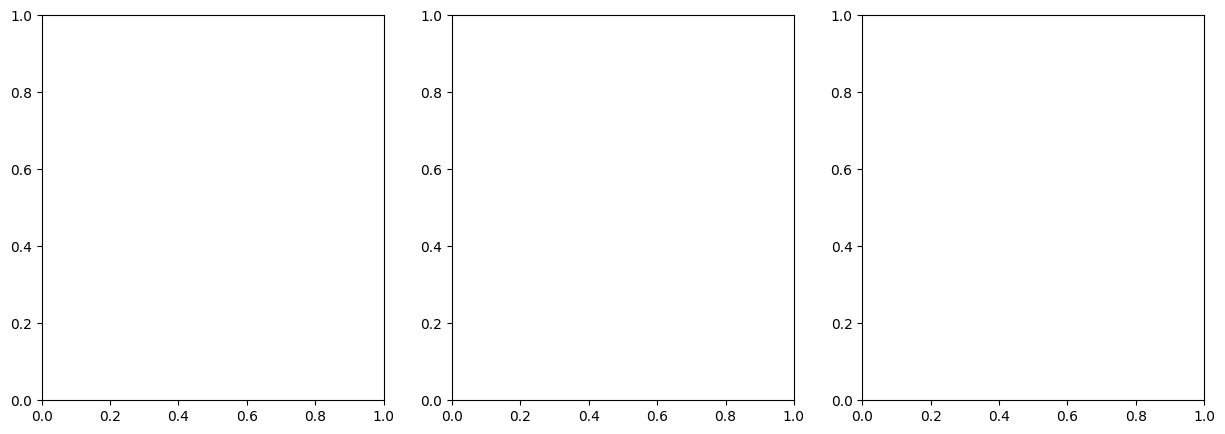

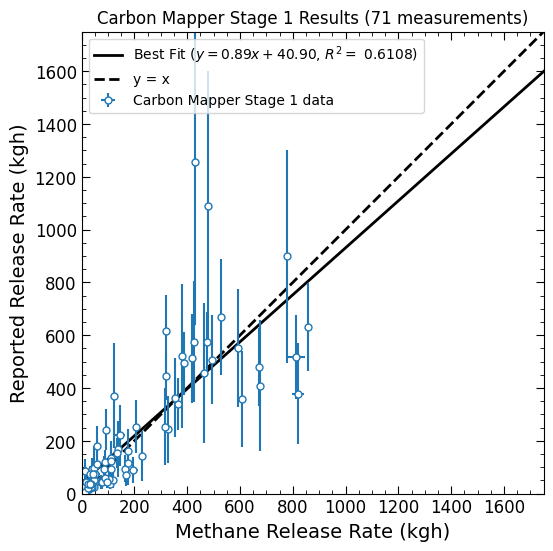

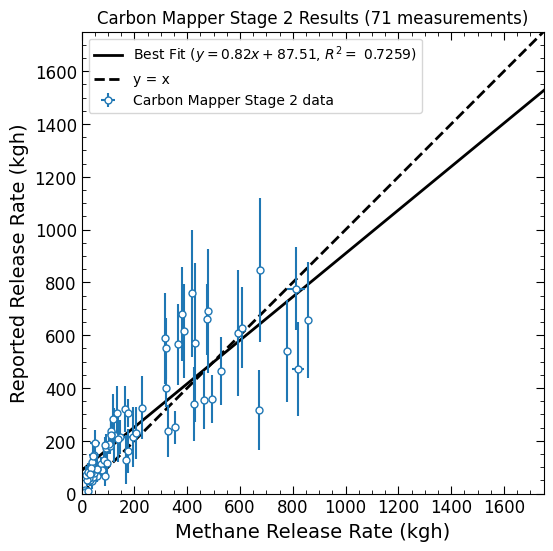

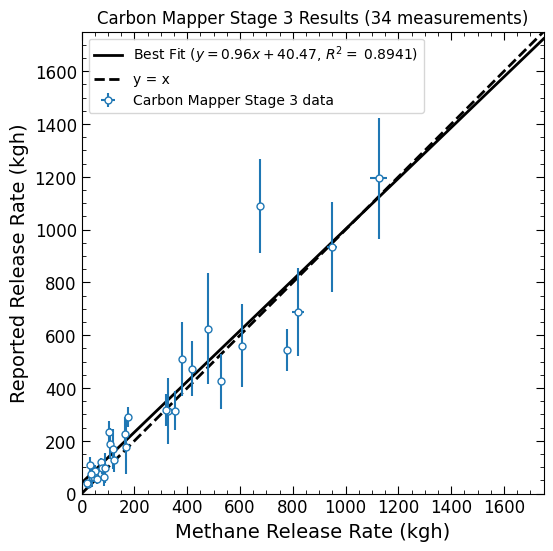

In [1]:
from plot_methods import plot_parity
import matplotlib.pyplot as plt



fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=[15, 5])
ax1 = plot_parity('Carbon Mapper', 1)
ax2 = plot_parity('Carbon Mapper', 2)
ax3 = plot_parity('Carbon Mapper', 3)

Loading parity data...
Initializing figure...
Making Carbon Mapper plots..
Making GHGSat plots..


(0.0, 1.0, 0.0, 1.0)

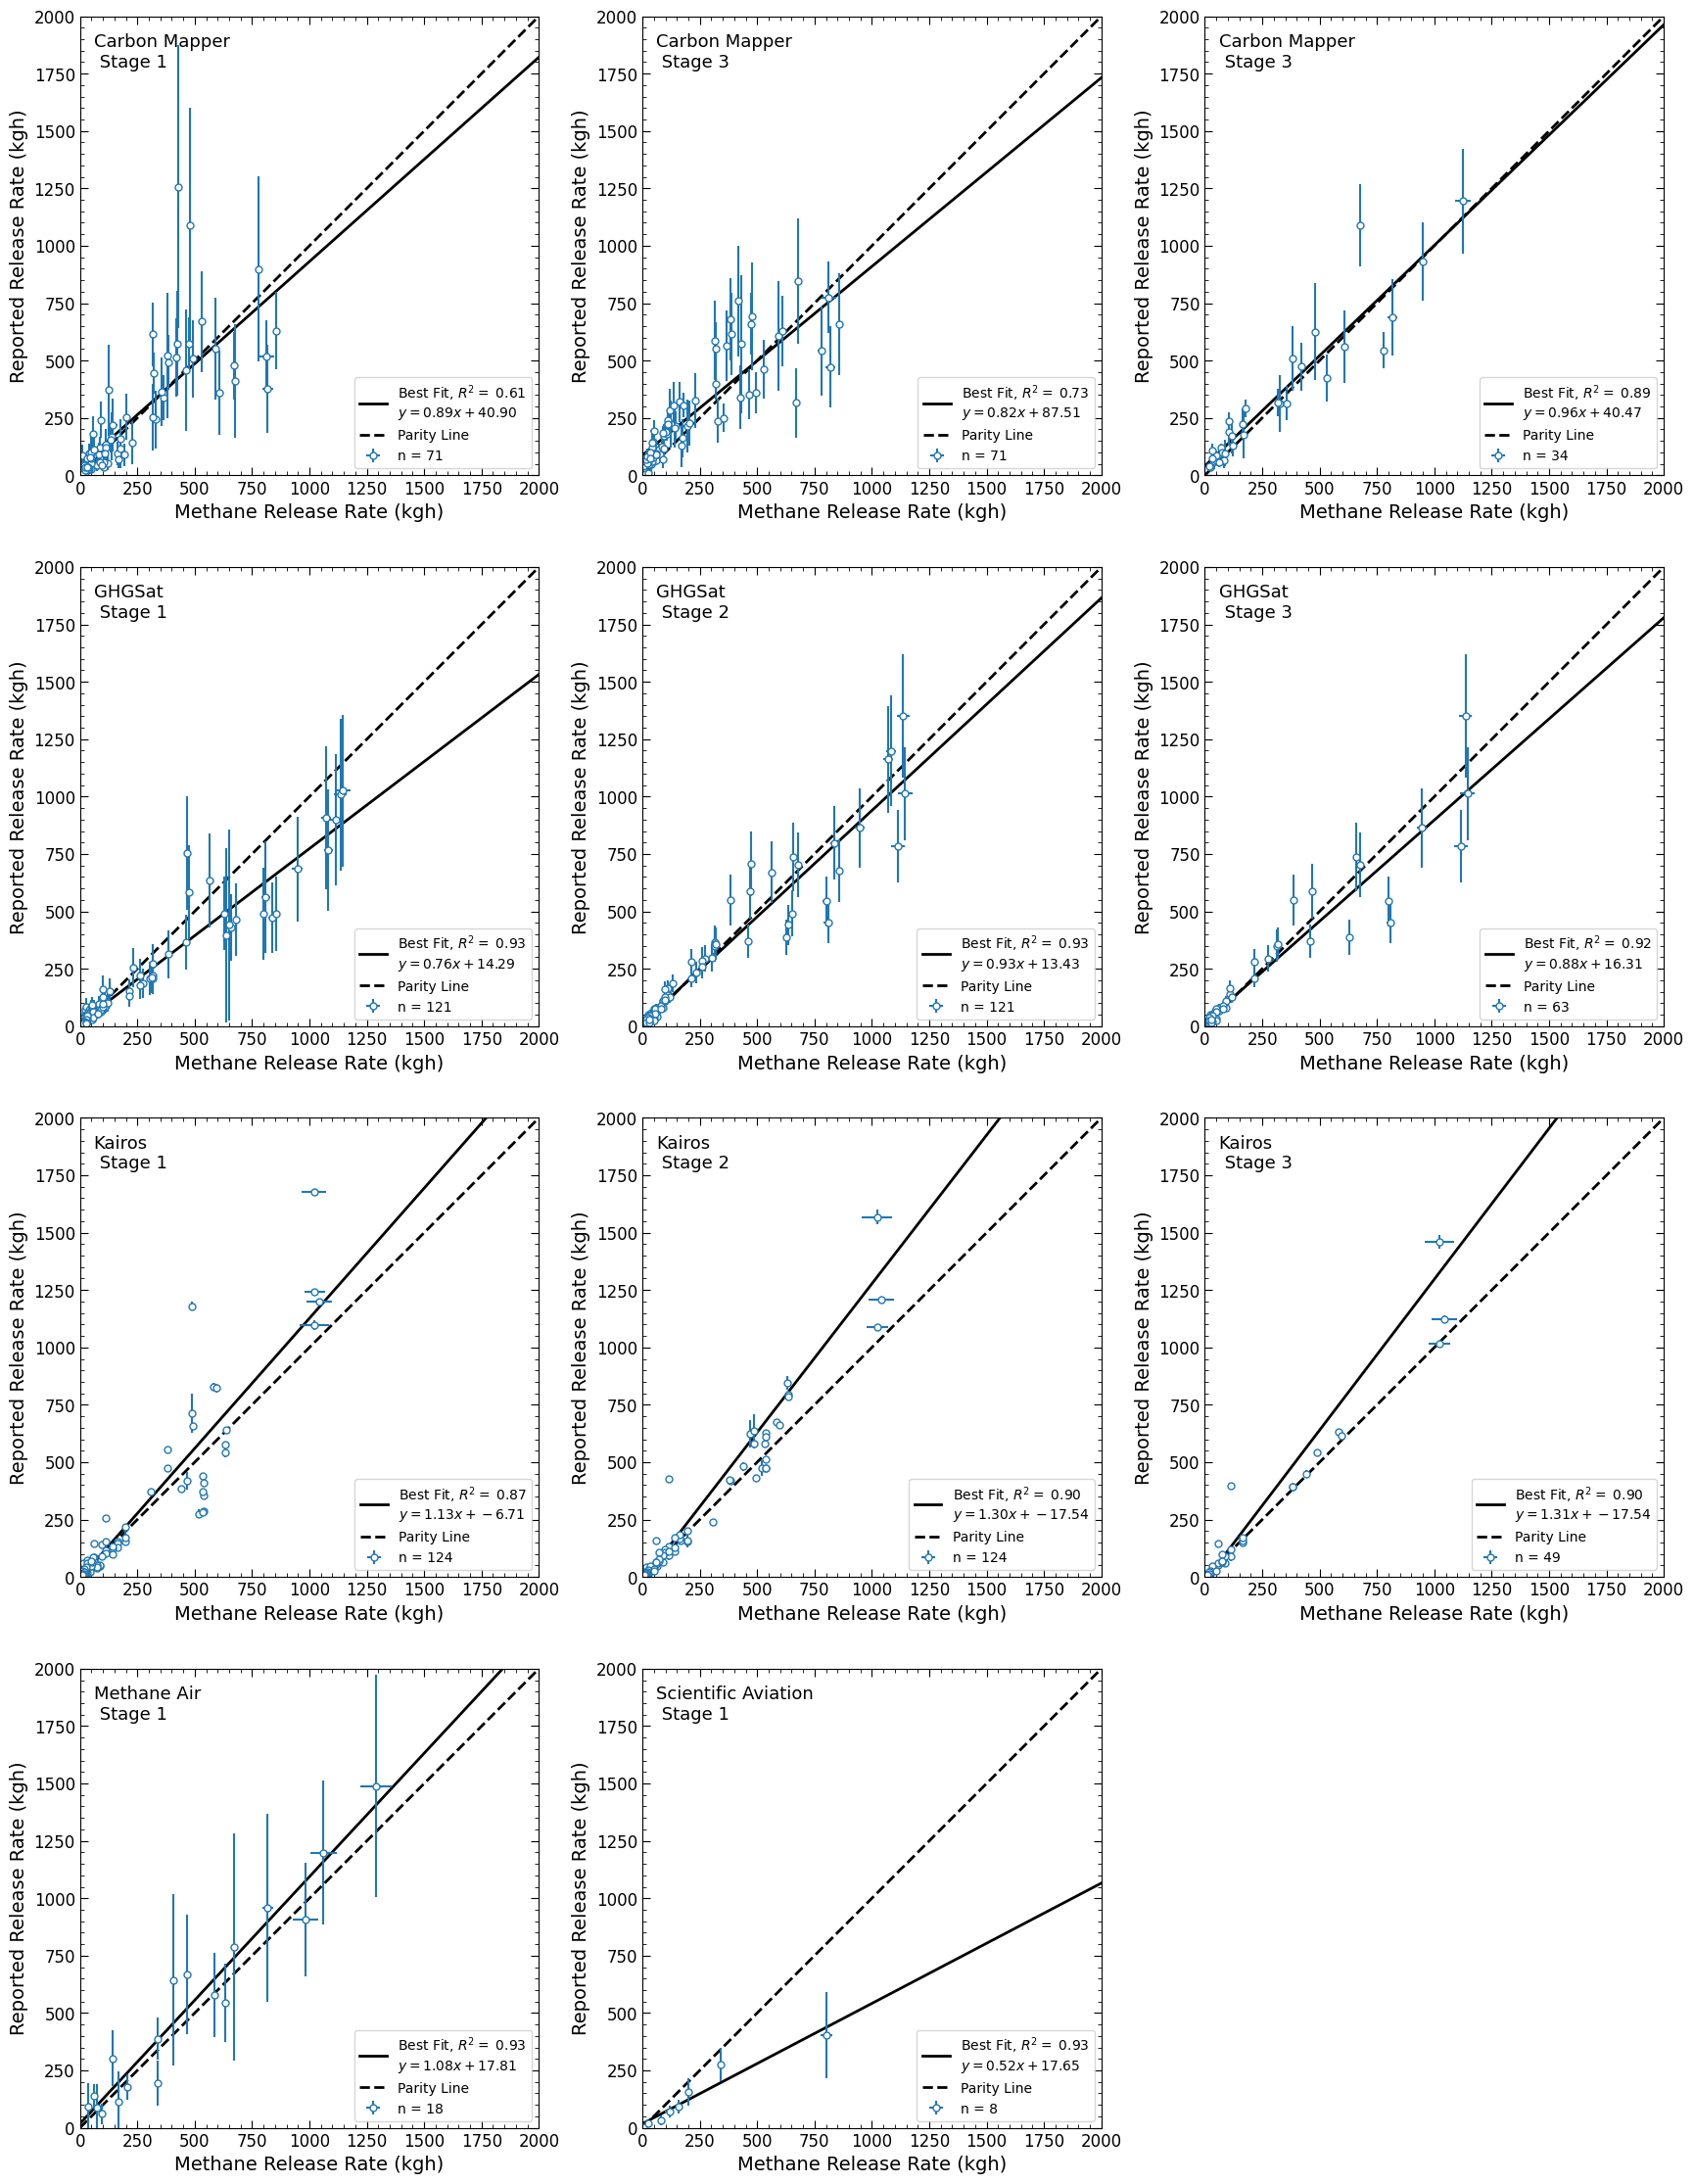

In [ ]:
from plot_methods import get_parity_data, make_parity_plot
import matplotlib.pyplot as plt

cm_1_data, cm_1_notes = get_parity_data('Carbon Mapper', stage = 1)
cm_2_data, cm_2_notes = get_parity_data('Carbon Mapper', stage = 2)
cm_3_data, cm_2_notes = get_parity_data('Carbon Mapper', stage = 3)
ghg_1_data, ghg_1_notes = get_parity_data('GHGSat', stage = 1)
ghg_2_data, ghg_2_notes = get_parity_data('GHGSat', stage = 2)
ghg_3_data, ghg_3_notes = get_parity_data('GHGSat', stage = 3)
kairos_1_data, kairos_1_notes = get_parity_data('Kairos', stage=1)
kairos_2_data, kairos_2_notes = get_parity_data('Kairos', stage=2)
kairos_3_data, kairos_3_notes = get_parity_data('Kairos', stage=3)
mair_1_data, mair_1_notes = get_parity_data('Methane Air', stage=1)
sciav_1_data, sciav_1_notes = get_parity_data('Scientific Aviation', stage=1, strict_discard=True)

fig, [[ax1, ax2, ax3],[ax4, ax5, ax6],[ax7, ax8, ax9],[ax10, ax11, ax12]] = plt.subplots(4, 3, figsize=[21, 28])

# Carbon Mapper
ax1 = make_parity_plot(cm_1_data, cm_1_notes, ax1, [0, 2000])
ax2 = make_parity_plot(cm_2_data, cm_2_notes, ax2, [0, 2000])
ax3 = make_parity_plot(cm_3_data, cm_2_notes, ax3, [0, 2000])

print('Making GHGSat plots..')
# GHGSat
ax4 = make_parity_plot(ghg_1_data, ghg_1_notes, ax4, [0, 2000])
ax5 = make_parity_plot(ghg_2_data, ghg_2_notes, ax5, [0, 2000])
ax6 = make_parity_plot(ghg_3_data, ghg_3_notes, ax6, [0, 2000])

# Kairos
ax7 = make_parity_plot(kairos_1_data, kairos_1_notes, ax7, [0, 2000])
ax8 = make_parity_plot(kairos_2_data, kairos_2_notes, ax8, [0, 2000])
ax9 = make_parity_plot(kairos_3_data, kairos_3_notes, ax9, [0, 2000])

# MethaneAIR

ax10 = make_parity_plot(mair_1_data, mair_1_notes, ax10, [0, 2000])

# Scientific Aviation
ax11 = make_parity_plot(sciav_1_data, sciav_1_notes, ax11, [0, 2000])

# Turn off last axes
ax12.axis('off')

